In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/tejan/Desktop/Data_Science_Practice/census_income_dataset.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  48842 non-null  object 
 14  income_level    48842 non-null  int32  
dtypes: float64(4), int32(1), int64(2), object(8)
memory usage: 5.4+ MB


In [9]:
df.income_level.value_counts()

0    37155
1    11687
Name: income_level, dtype: int64

In [6]:
df['income_level']= np.where(df['income_level'] == '>50K', 1,0 )

In [11]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [14]:
df.isnull().any().sum()

0

In [21]:
#seperating cat and num feature 

Cat_feature = df.loc[ :, df.dtypes == 'object']
Cat_feature.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [28]:
Cat_feature.marital_status.value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [29]:
Cat_feature.drop(['race'], axis =1 , inplace = True)

C:\Users\tejan\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
Num_feature = df.loc[ :, (df.dtypes == 'int32') | (df.dtypes == 'int64') | (df.dtypes == 'float64')]
Num_feature.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516.0,13,2174.0,0.0,40.0,0
1,50,83311.0,13,0.0,0.0,13.0,0
2,38,215646.0,9,0.0,0.0,40.0,0
3,53,234721.0,7,0.0,0.0,40.0,0
4,28,338409.0,13,0.0,0.0,40.0,0


In [23]:
# cutting at 99%

Num_feature = Num_feature.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [33]:
Cat_feature.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Cat_feature = pd.get_dummies(Cat_feature, drop_first=True)

In [35]:
df_Final = pd.concat([Num_feature, Cat_feature], axis = 1)

In [38]:
df_Final.rename( columns = { 'income_level' : 'Target'}, inplace = True )

In [ ]:
# now working on feature reduction techniques
'''
1. I will checking IV of the variables
2. then I will check correlation between the variables
3. I will check multicoleanearity as well using VIF
4. Then I will be doing K-fold cross validation
5. and at last using RF and DT,  i will do first cut with feature importance 

'''

In [47]:
import re
import traceback
import string
import pandas.core.algorithms as algos
from pandas import Series

In [42]:
max_bin = 20
force_bin = 3


def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    
    bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
    if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
    
    d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
    d2 = d1.groupby('Bucket', as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
        
        
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]  
    
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)
        
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


In [43]:
# defining final function 

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)



In [48]:

final_iv, IV = data_vars(df_Final,df_Final.Target)

C:\Users\tejan\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
IV.sort_values('IV', ascending= False).to_csv('C:/Users/tejan/Desktop/IV_values.csv')

In [61]:
df_Final.corr().to_csv('C:/Users/tejan/Desktop/corr.csv')

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [64]:
# # finding VIF

# # get all the dependent avriables
# features = ' + '.join(df_Final.columns.difference(['Target']))


# # run the dmatrices
# a, b = dmatrices('Target ~ ' + features, data = df_Final, return_type = 'dataframe')

# # get the VIF
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
# vif["features"] = b.columns

# vif

In [58]:
df_Final.drop([
'occupation_Priv-house-serv',
'education_5th-6th',
'occupation_Farming-fishing',
'workclass_Federal-gov',
'education_12th',
'education_1st-4th',
'marital_status_Married-spouse-absent',
'fnlwgt',
'education_Preschool',
'native_country_United-States',
'workclass_Local-gov',
'native_country_Guatemala',
'native_country_El-Salvador',
'native_country_Dominican-Republic',
'workclass_Self-emp-not-inc',
'native_country_Columbia',
'occupation_Protective-serv',
'occupation_Sales',
'native_country_Puerto-Rico',
'native_country_India',
'occupation_Tech-support',
'occupation_Transport-moving',
'native_country_Vietnam',
'native_country_Nicaragua',
'native_country_England',
'native_country_Canada',
'workclass_State-gov',
'native_country_Outlying-US(Guam-USVI-etc)',
'native_country_Peru',
'native_country_Taiwan',
'native_country_Haiti',
'native_country_Jamaica',
'occupation_Craft-repair',
'native_country_Trinadad&Tobago',
'native_country_France',
'native_country_Japan',
'native_country_Iran',
'native_country_Laos',
'native_country_Greece',
'native_country_Italy',
'native_country_Philippines',
'native_country_Ecuador',
'marital_status_Married-AF-spouse',
'workclass_Without-pay',
'education_Assoc-acdm',
'native_country_South',
'native_country_Honduras',
'education_Assoc-voc',
'native_country_China',
'native_country_Germany',
'native_country_Portugal',
'native_country_Yugoslavia',
'native_country_Scotland',
'native_country_Poland',
'native_country_Thailand',
'native_country_Cambodia',
'occupation_Armed-Forces',
'native_country_Ireland',
'native_country_Hungary',
'native_country_Hong',
'native_country_Cuba',
'workclass_Never-worked',
'native_country_Holand-Netherlands'    
], axis = 1, inplace = True)

In [62]:
df_Final.drop(['marital_status_Never-married',
'relationship_Not-in-family'
], axis = 1, inplace = True)

In [65]:
df_Final.shape

(48842, 32)

In [67]:
X = df_Final.drop(['Target'], axis = 1 )

In [70]:
 Y = df_Final['Target']

In [71]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( X,
                                                      Y,
                                                      test_size = 0.3,
                                                      random_state = 1234 )

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
pargrid_rf = {'n_estimators': [ 250, 300, 350, 400, 450],
                  'max_features': [12, 13,14,15]}

from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(oob_score=True), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  7.7min finished


In [84]:
gscv_rf.best_params_

{'max_features': 13, 'n_estimators': 400}

In [85]:
gscv_rf.best_score_

0.8472023793252337

In [97]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=400, max_features=12, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=12, n_estimators=400, n_jobs=-1,
                       oob_score=True)

In [98]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [99]:
from sklearn import metrics

In [100]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.8447416911212721
0.7704544644836432


In [101]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf.predict( train_X ) } )

In [133]:
print(metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted ))
print(metrics.roc_auc_score( radm_train_pred.actual, radm_train_pred.predicted ))

0.9563017344760011
0.9305570871111762


In [112]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 15.0, 'Predicted label')

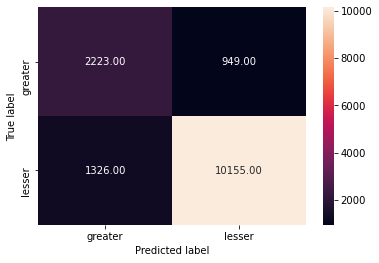

In [114]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["greater", "lesser"] , yticklabels = ["greater", "lesser"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [103]:
feature_columns = df_Final.columns.difference( ['Target'] )

In [104]:
xxx = pd.DataFrame({'feature':feature_columns, 'importance':radm_clf.feature_importances_})

In [135]:
xxx.sort_values('importance', ascending= False).reset_index()

,index,feature,importance
0,0,age,0.230306
1,16,marital_status_Widowed,0.181257
2,2,capital_loss,0.138804
3,4,education_7th-8th,0.122898
4,1,capital_gain,0.108661
5,3,education_11th,0.040487
6,5,education_9th,0.025014
7,20,occupation_Handlers-cleaners,0.019128
8,24,relationship_Other-relative,0.017203
9,29,workclass_Private,0.015879


In [283]:
# working on DT
from sklearn.tree import DecisionTreeClassifier,export_graphviz, export

In [118]:
param_grid = {'max_depth': np.arange(2, 12),
             'max_features': np.arange(12,18)}

In [119]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,verbose=0)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([12, 13, 14, 15, 16, 17])})

In [120]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=17)

In [ ]:
tree.best_score_

In [121]:
# building DT
clf_tree = DecisionTreeClassifier( max_depth = 10, max_features=17)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=10, max_features=17)

In [122]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
dataframe = pd.DataFrame({'feature':feature_columns, 'importance':clf_tree.feature_importances_})

In [134]:
dataframe.sort_values(by = 'importance', axis = 0, ascending = False).reset_index()

,index,feature,importance
0,16,marital_status_Widowed,0.401405
1,2,capital_loss,0.173075
2,1,capital_gain,0.110659
3,24,relationship_Other-relative,0.058760
4,10,education_Prof-school,0.057886
5,0,age,0.056240
6,3,education_11th,0.053050
7,4,education_7th-8th,0.041607
8,20,occupation_Handlers-cleaners,0.022721
9,29,workclass_Private,0.005389


In [124]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [127]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [128]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.8661557810991839

In [125]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8525899133283287

In [129]:
metrics.roc_auc_score(tree_test_pred.actual, tree_test_pred.predicted )

0.7505185228943819

Text(0.5, 15.0, 'Predicted label')

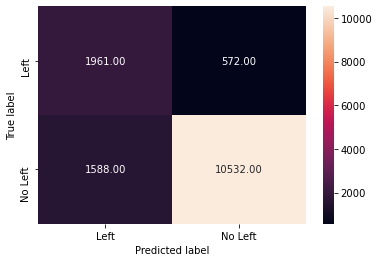

In [131]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [132]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "income_tree.odt",
              feature_names = train_X.columns )

In [ ]:
##################################################################

## Recreating a model

In [ ]:
# recreating a model with significant variables

In [142]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [140]:
df['income_level']= np.where(df['income_level'] == '>50K', 1,0 )

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   fnlwgt          48842 non-null  float64
 2   marital_status  48842 non-null  int32  
 3   sex             48842 non-null  int32  
 4   capital_gain    48842 non-null  float64
 5   capital_loss    48842 non-null  float64
 6   hours_per_week  48842 non-null  float64
 7   income_level    48842 non-null  int32  
 8   workclass       48842 non-null  object 
 9   occupation      48842 non-null  object 
 10  relationship    48842 non-null  object 
dtypes: float64(4), int32(3), int64(1), object(3)
memory usage: 3.5+ MB


In [152]:
df['native_country'] = np.where( df['native_country'] == 'United-States', 'United-States', 'Others')

In [156]:
df.drop(['race'], axis =1 , inplace = True)

In [201]:
Num_feature = df.loc[ :, (df.dtypes == 'int32') | (df.dtypes == 'int64') | (df.dtypes == 'float64')]
Num_feature.head()

,age,fnlwgt,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,77516.0,0,1,2174.0,0.0,40.0,1,0
1,50,83311.0,1,1,0.0,0.0,13.0,1,0
2,38,215646.0,0,1,0.0,0.0,40.0,1,0
3,53,234721.0,1,1,0.0,0.0,40.0,1,0
4,28,338409.0,1,0,0.0,0.0,40.0,0,0


In [164]:
df['marital_status'] = np.where(df['marital_status'].isin(['Never-married', 'Divorced', 'Separated', 'Widowed' ]), 'single', 'Married')

In [166]:
df['marital_status'] = np.where(df['marital_status'] == 'Married', 1, 0)
df['sex'] = np.where(df['sex'] == 'Male', 1, 0)
df['native_country'] = np.where(df['native_country'] == 'Others', 0, 1)

In [161]:
Cat_feature.marital_status.value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [213]:
Cat_feature = df.loc[ :, df.dtypes == 'object']
Cat_feature.head()

,workclass,education,occupation,relationship
0,State-gov,Bachelors,Adm-clerical,Not-in-family
1,Self-emp-not-inc,Bachelors,Exec-managerial,Husband
2,Private,HS-grad,Handlers-cleaners,Not-in-family
3,Private,11th,Handlers-cleaners,Husband
4,Private,Bachelors,Prof-specialty,Wife


In [220]:
Cat_feature.workclass.value_counts()

Private           33906
Unemployed         6692
Government_Job     6549
Self-emp-inc       1695
Name: workclass, dtype: int64

In [217]:
Cat_feature['workclass'] = np.where(Cat_feature['workclass'].isin(['Local-gov', 'State-gov', 'Federal-gov']), 'Government_Job',
        np.where(Cat_feature['workclass'].isin(['?','Without-pay', 'Never-worked']) ,'Unemployed', Cat_feature['workclass']))

<ipython-input-217-89dc24940aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_feature['workclass'] = np.where(Cat_feature['workclass'].isin(['Local-gov', 'State-gov', 'Federal-gov']), 'Government_Job',


In [218]:
Cat_feature['workclass'] = np.where(Cat_feature['workclass'] == 'Self-emp-not-inc', 'Unemployed', Cat_feature['workclass'])

<ipython-input-218-78fb2049f871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cat_feature['workclass'] = np.where(Cat_feature['workclass'] == 'Self-emp-not-inc', 'Unemployed', Cat_feature['workclass'])


In [223]:
Cat_feature['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

C:\Users\tejan\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [317]:
Cat_feature

,workclass,education,occupation,relationship
0,Government_Job,Bachelors,Adm-clerical,Not-in-family
1,Unemployed,Bachelors,Exec-managerial,Husband
2,Private,HS-grad,Handlers-cleaners,Not-in-family
3,Private,School,Handlers-cleaners,Husband
4,Private,Bachelors,Prof-specialty,Wife
...,...,...,...,...
48837,Private,Bachelors,Prof-specialty,Not-in-family
48838,Unemployed,HS-grad,?,Other-relative
48839,Private,Bachelors,Prof-specialty,Husband
48840,Private,Bachelors,Adm-clerical,Own-child


In [231]:
Cat_feature.workclass.value_counts()

Private           33906
Unemployed         6692
Government_Job     6549
Self-emp-inc       1695
Name: workclass, dtype: int64

In [200]:
df.drop(['education_num'], axis = 1, inplace = True)

In [211]:
Cat_feature = pd.get_dummies(Cat_feature, drop_first=True)

In [234]:
df.head()

,age,fnlwgt,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level,workclass,education,occupation,relationship
0,39,77516.0,0,1,2174.0,0.0,40.0,1,0,Government_Job,Bachelors,Adm-clerical,Not-in-family
1,50,83311.0,1,1,0.0,0.0,13.0,1,0,Unemployed,Bachelors,Exec-managerial,Husband
2,38,215646.0,0,1,0.0,0.0,40.0,1,0,Private,HS-grad,Handlers-cleaners,Not-in-family
3,53,234721.0,1,1,0.0,0.0,40.0,1,0,Private,School,Handlers-cleaners,Husband
4,28,338409.0,1,0,0.0,0.0,40.0,0,0,Private,Bachelors,Prof-specialty,Wife


In [ ]:
df = pd.concat([Num_feature, Cat_feature], axis = 1)

In [298]:
X = df.drop(['income_level'], axis=1)
Y = df['income_level']

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [300]:
from sklearn import preprocessing

categorical = ['workclass',  'occupation', 'relationship']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

<ipython-input-300-f48eeadf28f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-300-f48eeadf28f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


In [301]:
X_train

,age,fnlwgt,marital_status,sex,capital_gain,capital_loss,hours_per_week,workclass,occupation,relationship
3833,43,193494.0,1,1,0.0,0.0,40.0,1,10,0
34743,41,56236.0,0,1,1506.0,0.0,40.0,0,11,4
2022,32,160362.0,0,1,0.0,0.0,40.0,1,8,2
1580,26,266912.0,1,1,0.0,0.0,50.0,1,12,0
4612,38,136081.0,1,1,0.0,0.0,60.0,1,10,0
...,...,...,...,...,...,...,...,...,...,...
21243,65,404601.0,1,1,2414.0,0.0,30.0,3,0,0
45891,61,244856.0,1,1,4386.0,0.0,40.0,3,0,0
42613,41,344624.0,1,1,0.0,0.0,60.0,3,10,0
43567,47,104489.0,1,1,0.0,0.0,40.0,3,12,0


In [302]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [303]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34189 entries, 0 to 34188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34189 non-null  float64
 1   fnlwgt          34189 non-null  float64
 2   marital_status  34189 non-null  float64
 3   sex             34189 non-null  float64
 4   capital_gain    34189 non-null  float64
 5   capital_loss    34189 non-null  float64
 6   hours_per_week  34189 non-null  float64
 7   workclass       34189 non-null  float64
 8   occupation      34189 non-null  float64
 9   relationship    34189 non-null  float64
dtypes: float64(10)
memory usage: 2.6 MB


In [304]:
pargrid_rf = {'n_estimators': [ 80,100,150],
                  'max_features': [3,4,5,6]}

from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min finished


In [305]:
gscv_rf.best_params_

{'max_features': 3, 'n_estimators': 150}

In [306]:
gscv_rf.best_score_

0.8468805023746239

In [307]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=150, max_features=3, n_jobs=-1)
radm_clf.fit( X_train, Y_train )

RandomForestClassifier(max_features=3, n_estimators=150, n_jobs=-1,
                       oob_score=True)

In [308]:
radm_test_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [309]:
from sklearn import metrics

In [310]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.8491093973930253
0.7643776116006784


In [311]:
radm_train_pred = pd.DataFrame( { 'actual':  Y_train,
                            'predicted': radm_clf.predict( X_train ) } )

In [312]:
print(metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted ))
print(metrics.roc_auc_score( radm_train_pred.actual, radm_train_pred.predicted ))

0.9998537541314458
0.9998207600110559


In [313]:
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\tejan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

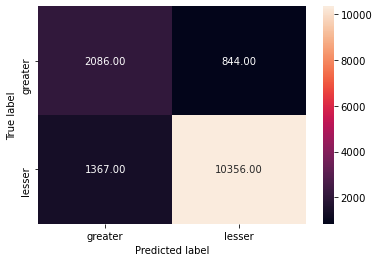

In [314]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["greater", "lesser"] , yticklabels = ["greater", "lesser"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [270]:
df.head()

,age,fnlwgt,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level,workclass,education,occupation,relationship
0,39,77516.0,0,1,2174.0,0.0,40.0,1,0,Government_Job,Bachelors,Adm-clerical,Not-in-family
1,50,83311.0,1,1,0.0,0.0,13.0,1,0,Unemployed,Bachelors,Exec-managerial,Husband
2,38,215646.0,0,1,0.0,0.0,40.0,1,0,Private,HS-grad,Handlers-cleaners,Not-in-family
3,53,234721.0,1,1,0.0,0.0,40.0,1,0,Private,School,Handlers-cleaners,Husband
4,28,338409.0,1,0,0.0,0.0,40.0,0,0,Private,Bachelors,Prof-specialty,Wife


In [271]:
feature_columns = df.columns.difference( ['income_level'] )

In [272]:
xxx = pd.DataFrame({'feature':feature_columns, 'importance':radm_clf.feature_importances_})

In [273]:
xxx.sort_values('importance', ascending= False).reset_index()

,index,feature,importance
0,1,capital_gain,0.196835
1,0,age,0.159372
2,4,fnlwgt,0.120070
3,2,capital_loss,0.098329
4,9,relationship,0.087818
5,11,workclass,0.086825
6,6,marital_status,0.084697
7,10,sex,0.074520
8,5,hours_per_week,0.039024
9,8,occupation,0.033108


In [288]:
df.drop(['education','native_country' ], axis = 1 , inplace = True)

In [274]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [275]:
acc_decision_tree

100.0

In [6]:
# # Exporting the tree output in the form opendocument
# export_graphviz( radm_clf,
#               out_file = "income_tree.odt",
#               feature_names = X_train.columns )

In [285]:
# from sklearn import tree

In [5]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(
#                 out_file='tree.dot', 
#                 feature_names = X_train.columns,
# #                 class_names = iris.target_names,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

In [4]:
# tree.plot_tree(radm_clf, feature_names = X_train.columns,filled = True)